# Scipy
Documentation : https://docs.scipy.org/doc/scipy/reference/

#### Sommaire :
* [1](#1) : Interpolation
* [2](#2) : Optimisation
    * [2.1](#2.1) : Curve fit
    * [2.2](#2.2) : Minimisation 1D
    * [2.3](#2.3) : Minimisation 2D
* [3](#3) : Traitement du signal
    * [3.1](#3.1) : Les bases
    * [3.2](#3.2) : Transformation de Fourier
* [4](#4) : Image processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Interpolation <a class="anchor" id="1"></a>
Une interpolation permet de compléter un dataset dont certaines données sont manquantes en les calculant à partir des données voisines. Attention à ne pas déformer la réalité d'un dataset.
* **interp1d()** : retourne une nouvelle fonction d'interpolation à partir de données existantes.
    * **kind=** : type d'interpolation (linear, cubic, nearest, quadratic...)

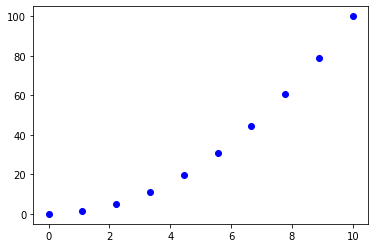

In [2]:
# Création d'un Dataset
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y, c="blue")
plt.show()

In [3]:
from scipy.interpolate import interp1d

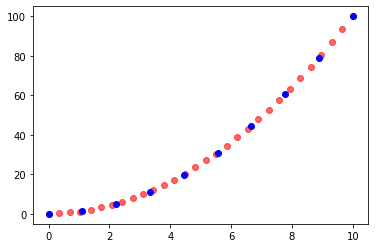

In [4]:
# création de la fonction interpolation f
f = interp1d(x, y, kind="linear")

# résultats de la fonction interpolation f sur de nouvelles données
new_x = np.linspace(0, 10, 30)
result = f(new_x)

# visualisation avec matplotlib
plt.scatter(new_x, result, c="red", alpha=0.6)
plt.scatter(x, y, c="blue")
plt.show()

# 2. Optimisation <a class="anchor" id="2"></a>
### 2.1. Curve fit <a class="anchor" id="2.1"></a>
* **optimize.curve_fit()** : utilise la méthode des moindres carrés pour trouver les meilleurs paramètres d'un modèle fournit à la fonction. Retourne 2 tableaux : le premier correspondant aux paremètres optimaux du modèles, et le second correspondant à la covariance de ces paramètres.

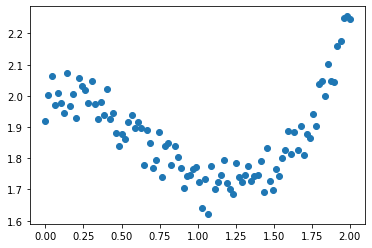

In [5]:
# Création d'un Dataset avec du bruit "normal"
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)
plt.show()

In [6]:
# Définition d'un modele statistique sensé "coller" au dataset ci-dessus
def f (x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [7]:
from scipy import optimize

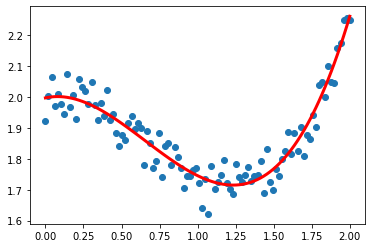

In [8]:
# curve_fit permet de trouver les parametres du modele f grace a la méthode des moindres carrés
params, param_cov = optimize.curve_fit(f, x, y)

# Visualisation des résultats.
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='r', lw=3)
plt.show()

### 2.2. Minimisation 1D <a class="anchor" id="2.2"></a>
* **optimize.minimize**() : Trouve un minimum local dans une fonction à N dimensions 

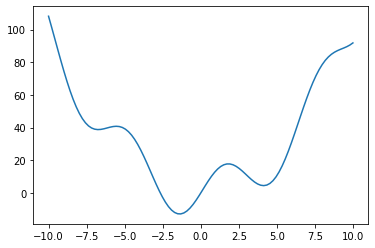

In [9]:
# Définition d'une fonction a 1 Dimension
def f(x):
    return x**2 + 15*np.sin(x)

# Visualisation de la fonction
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))
plt.show()

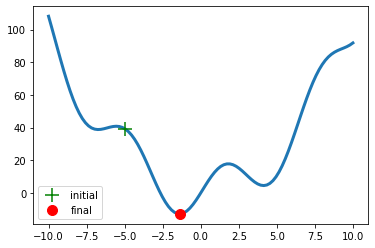

In [19]:
# Définition d'un point x0 pour l'algorithme de minimisation
x0=-5
result = optimize.minimize(f, x0=x0).x # résultat de la minimisation (ajouter .x pour avoir accès à la valeur du minimum)

# Visualisation du résultat
plt.plot(x, f(x), lw=3, zorder=-1) # Courbe de la fonction
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1, label='initial') # point initial
plt.scatter(result, f(result), s=100, c='r', zorder=1, label='final') # point final
plt.legend()
plt.show()

### 2.3. Minimisation 2D <a class="anchor" id="2.3"></a>

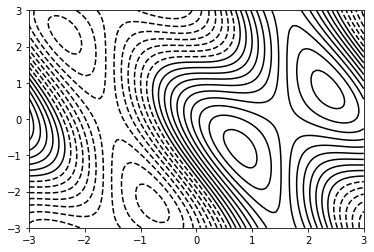

In [29]:
# Définition d'une fonction 2D. X est un tableau numpy a 2-Dimension
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

# Génération de la fonction sur un espace 2D.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

# Visualisation de la fonction
plt.contour(x, y, f(np.array([x, y])), 20, colors="black")
plt.show()

le minimum est aux coordonées [-0.78539916 -2.35619343]


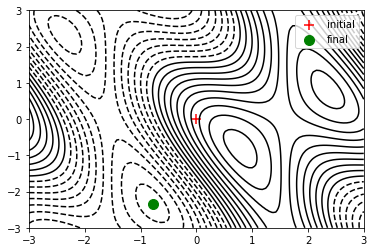

In [27]:
# Placement d'un point x0 initial aux coordonées (0,0)
x0 = np.zeros((2, 1))

# Minimisation de la fonction
result = optimize.minimize(f, x0=x0).x
print('le minimum est aux coordonées', result) # imprimer le résultat

# Visualisation du résultat
plt.contour(x, y, f(np.array([x, y])), 20, colors="black") # fonction 2D
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # Point de départ
plt.scatter(result[0], result[1], c='g', s=100, label='final') # Point final
plt.legend()
plt.show()

# 3. Traitement du signal <a class="anchor" id="3"></a>
### 3.1. Les bases <a class="anchor" id="3.1"></a>
* **signal.detrend()** : Permet d'éliminer la tendance linéaire d'un signal.

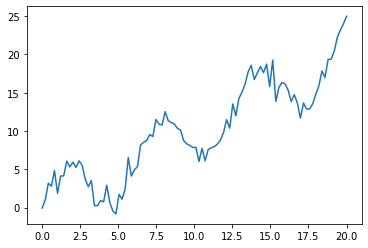

In [33]:
# Création d'un Dataset avec une tendance linéaire
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x, y)
plt.show()

In [32]:
from scipy import signal

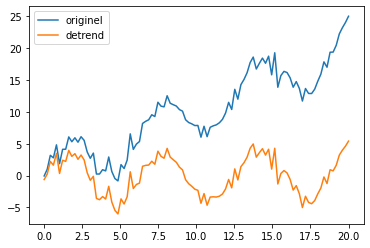

In [34]:
# Élimination de la tendance linéaire
new_y = signal.detrend(y)

# Visualisation des résultats
plt.plot(x, y, label='originel')
plt.plot(x, new_y, label='detrend')
plt.legend()
plt.show()

### 3.2. Transformation de Fourier (FFT) <a class="anchor" id="3.2"></a>
La transformation de Fourier permet d'analyser les **fréquences** qui composent un **signal périodique** (qui se répete avec le temps). Cette opération produit un graphique que l'on appelle **Spectre**. Une fois le Spectre généré, il est possible de filtrer les bruits indésirables, ou bien de sélectionner seulement certaines fréquences, ou d'en atténuer d'autres.
* **ftpack.fft**() : effectue la transformé de fourrier
* **fftpack.fftfreq**() : récupère les fréquences 
* **fftpack.ifft**() : genère un nouveau signal depuis le spectre filtré

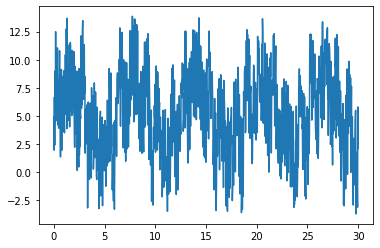

In [44]:
# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(7*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)
plt.show()

In [45]:
from scipy import fftpack

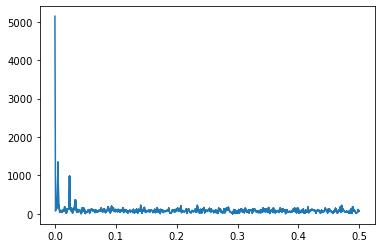

In [50]:
# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(y)
power = np.abs(fourier) # la variable power est créée pour éiminer les amplitudes négatives
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power) # On utilise aussi la valeur absolue de la fréquence
plt.show()

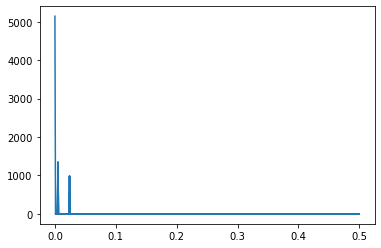

In [58]:
# filtre du spectre avec du boolean indexing de Numpy
fourier[power<100] = 0

# Visualisation du spetre propre
plt.plot(np.abs(frequences), np.abs(fourier))
plt.show()

C:\Users\thide\miniconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


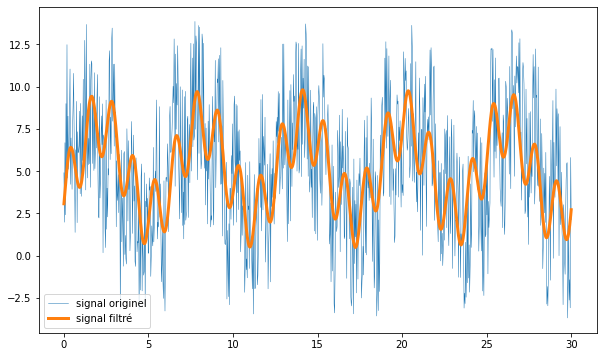

In [61]:
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()

# 4. Image processing <a class="anchor" id="4"></a>
* **ndimage.binary_opening**() : Elimine les artefacts d'une image
* **ndimage.label**() : Segmentation de l'image. Retourne deux tableaux, le premier contient les labels, et le second le nombre de labels.

In [73]:
from scipy import ndimage

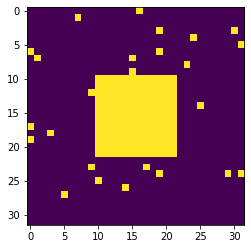

In [80]:
# Création d'une image avec quelques artefacts
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1 # ajout d'artefacts aléatoires
plt.imshow(X)
plt.show()

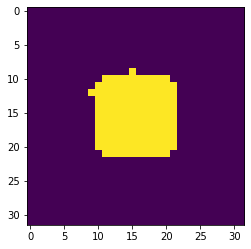

In [81]:
# opération de binary_opening = érosion puis dilation
open_X = ndimage.binary_opening(X)
plt.imshow(open_X)
plt.show()